# **THE PROMOTION PARADOX:**
### *Fixing Biased Talent Promotion Decisions Through Data-Driven HR Analytics*

**Final project by Syntax Society**
- Bayu Maitra
- Dian Ulhaq
- Febiansyah Ahnaf
- Keisya Nisrina Aulia
- Maslahatul Husna

# **IMPORT TOOLS & LOAD DATASET**

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from google.colab import files
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_validate, RandomizedSearchCV, StratifiedKFold
from imblearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, confusion_matrix
from matplotlib import rcParams

rcParams['figure.figsize'] = (15, 5)
rcParams['lines.linewidth'] = 2.5
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from imblearn.combine import SMOTETomek


In [ ]:
# load data
df = pd.read_csv("dataset_promotion_scaled.csv")
df.head()

,Age,Performance_Score,Leadership_Score,Training_Hours,Projects_Handled,Peer_Review_Score,Current_Position_Level,Promotion_Eligible,Leadership_Index,Performance_Index,Potential_Index,Growth_Momentum,Leadership_Influence,Performance_Consistency
0,24.0,-0.701018,-0.220184,-1.035977,1.627892,0.349011,Junior,0.0,0.172393,0.499204,-0.805039,0.260405,-0.175344,0.357239
1,50.0,1.465699,-0.184340,-0.610027,0.178266,-1.591787,Junior,0.0,-1.443855,-1.437583,-1.281323,-0.135183,-0.363274,1.096978
2,56.0,1.465699,-1.116279,-0.077591,-0.727750,1.231192,Lead,0.0,0.420284,1.245916,0.233415,-0.280955,0.276325,0.009126
3,39.0,0.743460,0.030723,-1.497422,-0.727750,0.031426,Senior,0.0,0.043490,-0.002494,-1.296939,0.133730,-0.229885,-0.251958
4,41.0,0.743460,0.496693,-0.769758,1.084282,0.278437,Junior,0.0,0.509525,0.475869,-0.445875,0.023922,-0.244045,1.488605


In [ ]:
df = df.drop(columns=[
    'Performance_Score',
    'Leadership_Score',
    'Training_Hours',
    'Projects_Handled',
    'Peer_Review_Score',
])

# **PREPROCESSING**

## **Split & balancing**

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# split
X = df.drop(columns=['Promotion_Eligible', 'Age', 'Current_Position_Level'])
y = df['Promotion_Eligible']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# balancing
sm = SMOTE(random_state=42)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

### **Total train & test data**

In [ ]:
total_data = X_train.shape[0] + X_test.shape[0]

percent_train = (X_train.shape[0] / total_data) * 100
percent_test = (X_test.shape[0] / total_data) * 100

print(f"Jumlah data training (X_train): {X_train.shape[0]} baris ({percent_train:.2f}%)")
print(f"Jumlah data testing (X_test): {X_test.shape[0]} baris ({percent_test:.2f}%)")

Jumlah data training (X_train): 690 baris (69.91%)
Jumlah data testing (X_test): 297 baris (30.09%)


### **Target distribution before & after SMOTE**

In [ ]:
print("Distribusi Promotion_Eligible (sebelum SMOTE)")
print(y_train.value_counts())
print("\n")
print("Distribusi Promotion_Eligible (setelah SMOTE)")
print(y_train_smote.value_counts())

Distribusi Promotion_Eligible (sebelum SMOTE)
Promotion_Eligible
0.0    497
1.0    193
Name: count, dtype: int64


Distribusi Promotion_Eligible (setelah SMOTE)
Promotion_Eligible
0.0    497
1.0    497
Name: count, dtype: int64


## **Cross validation**

In [ ]:
skf = StratifiedKFold(
    n_splits=10,
    shuffle=True,
    random_state=42
)

# **LINEAR MODELING**

## **Logistic Regression**

### **Fit model**



In [ ]:
model_lr = LogisticRegression(random_state=42)

model_lr.fit(X_train_smote, y_train_smote)

# pred
y_pred_test = model_lr.predict(X_test)
y_pred_train = model_lr.predict(X_train_smote)

# proba
y_proba_test = model_lr.predict_proba(X_test)[:, 1]
y_proba_train = model_lr.predict_proba(X_train_smote)[:, 1]

# Confusion Matrix
cm_train = confusion_matrix(y_train_smote, y_pred_train)
cm_test = confusion_matrix(y_test, y_pred_test)

metrics_dict = {
    "Metric": ["Accuracy (Train)", "Accuracy (Test)", "Precision (Train)", "Precision (Test)", "Recall (Train)",
               "Recall (Test)", "F1 (Train)", "F1 (Test)", "ROC-AUC (Train)", "ROC-AUC (Test)"],
    "Score": [
        accuracy_score(y_train_smote, y_pred_train),
        accuracy_score(y_test, y_pred_test),
        precision_score(y_train_smote, y_pred_train),
        precision_score(y_test, y_pred_test),
        recall_score(y_train_smote, y_pred_train),
        recall_score(y_test, y_pred_test),
        f1_score(y_train_smote, y_pred_train),
        f1_score(y_test, y_pred_test),
        roc_auc_score(y_train_smote, y_proba_train),
        roc_auc_score(y_test, y_proba_test)
    ]
}

metrics_df = pd.DataFrame(metrics_dict)
display(metrics_df)

cm_train = confusion_matrix(y_train_smote, y_pred_train)
df_cm_train = pd.DataFrame(
    cm_train,
    index=["Actual 0", "Actual 1"],
    columns=["Pred 0", "Pred 1"]
)

print("\n=== Confusion Matrix (Train) ===")
display(df_cm_train)

cm_test = confusion_matrix(y_test, y_pred_test)
df_cm_test = pd.DataFrame(
    cm_test,
    index=["Actual 0", "Actual 1"],
    columns=["Pred 0", "Pred 1"]
)

print("\n=== Confusion Matrix (Test) ===")
display(df_cm_test)

,Metric,Score
0,Accuracy (Train),0.538229
1,Accuracy (Test),0.572391
2,Precision (Train),0.545455
3,Precision (Test),0.292453
4,Recall (Train),0.458753
5,Recall (Test),0.373494
6,F1 (Train),0.498361
7,F1 (Test),0.328042
8,ROC-AUC (Train),0.556125
9,ROC-AUC (Test),0.517228



=== Confusion Matrix (Train) ===


,Pred 0,Pred 1
Actual 0,307,190
Actual 1,269,228



=== Confusion Matrix (Test) ===


,Pred 0,Pred 1
Actual 0,139,75
Actual 1,52,31


### **Fit model (CV)**

In [ ]:
model_lr = LogisticRegression(random_state=42)

scores = cross_validate(
    model_lr,
    X_train_smote,
    y_train_smote,
    cv=skf,
    scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'],
    return_train_score=True
)

metrics_dict = {
    "Metric": [
        "F1 (Train)", "F1 (Test)",
        "Accuracy (Train)", "Accuracy (Test)",
        "Recall (Train)", "Recall (Test)",
        "Precision (Train)", "Precision (Test)",
        "ROC-AUC (Test)"
    ],
    "Score": [
        scores['train_f1'].mean(),
        scores['test_f1'].mean(),
        scores['train_accuracy'].mean(),
        scores['test_accuracy'].mean(),
        scores['train_recall'].mean(),
        scores['test_recall'].mean(),
        scores['train_precision'].mean(),
        scores['test_precision'].mean(),
        scores['test_roc_auc'].mean()
    ]
}

metrics_df = pd.DataFrame(metrics_dict)
display(metrics_df)

cm_train = confusion_matrix(y_train_smote, y_pred_train)
df_cm_train = pd.DataFrame(
    cm_train,
    index=["Actual 0", "Actual 1"],
    columns=["Pred 0", "Pred 1"]
)

print("\n=== Confusion Matrix (Train) ===")
display(df_cm_train)

cm_test = confusion_matrix(y_test, y_pred_test)
df_cm_test = pd.DataFrame(
    cm_test,
    index=["Actual 0", "Actual 1"],
    columns=["Pred 0", "Pred 1"]
)

print("\n=== Confusion Matrix (Test) ===")
display(df_cm_test)

,Metric,Score
0,F1 (Train),0.492925
1,F1 (Test),0.475076
2,Accuracy (Train),0.535436
3,Accuracy (Test),0.524172
4,Recall (Train),0.452261
5,Recall (Test),0.432694
6,Precision (Train),0.542153
7,Precision (Test),0.532039
8,ROC-AUC (Test),0.532424



=== Confusion Matrix (Train) ===


,Pred 0,Pred 1
Actual 0,307,190
Actual 1,269,228



=== Confusion Matrix (Test) ===


,Pred 0,Pred 1
Actual 0,139,75
Actual 1,52,31


### **Hyperparameter tuning**

In [ ]:
from imblearn.combine import SMOTETomek

pipe_lr = Pipeline([
    ("smote", SMOTETomek(random_state=42)),
    ("model", LogisticRegression(max_iter=5000, random_state=42))
])

param_lr = {
    "model__C": [0.001, 0.01, 0.1, 1, 10],
    "model__penalty": ["l2"],
    "model__class_weight": ["balanced"],
    "model__solver": ["liblinear", "lbfgs"]
}

grid_lr = GridSearchCV(pipe_lr, param_lr, cv=10, scoring="recall", n_jobs=-1)
grid_lr.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('smote', SMOTETomek(random_state=42)),
                                       ('model',
                                        LogisticRegression(max_iter=5000,
                                                           random_state=42))]),
             n_jobs=-1,
             param_grid={'model__C': [0.001, 0.01, 0.1, 1, 10],
                         'model__class_weight': ['balanced'],
                         'model__penalty': ['l2'],
                         'model__solver': ['liblinear', 'lbfgs']},
             scoring='recall')

### **Tuning Evaluation**

In [ ]:
best_lr = grid_lr.best_estimator_
# Predictions
lr_train_pred = best_lr.predict(X_train)
lr_test_pred  = best_lr.predict(X_test)

# Probabilities for ROC-AUC
lr_train_proba = best_lr.predict_proba(X_train)[:, 1]
lr_test_proba  = best_lr.predict_proba(X_test)[:, 1]

# Confusion Matrix
cm_train = confusion_matrix(y_train, lr_train_pred)
cm_test = confusion_matrix(y_test, lr_test_pred)

dt_results = {
    "Train Accuracy": accuracy_score(y_train, lr_train_pred),
    "Test Accuracy": accuracy_score(y_test, lr_test_pred),
    "Train Precision": precision_score(y_train, lr_train_pred),
    "Test Precision": precision_score(y_test, lr_test_pred),
    "Train Recall": recall_score(y_train, lr_train_pred),
    "Test Recall": recall_score(y_test, lr_test_pred),
    "Train F1 Score": f1_score(y_train, lr_train_pred),
    "Test F1 Score": f1_score(y_test, lr_test_pred),
    "ROC-AUC Train": roc_auc_score(y_train, lr_train_proba),
    "ROC-AUC Test": roc_auc_score(y_test, lr_test_proba),
}
df_dt = pd.DataFrame(dt_results, index=["Tuned Logistic Regression"]).T
display(df_dt)

# Confusion Matrix (Train)
df_cm_train = pd.DataFrame(
    cm_train,
    index=["Actual 0", "Actual 1"],
    columns=["Pred 0", "Pred 1"]
)
print("\n=== Confusion Matrix (Train) ===")
display(df_cm_train)

# Confusion Matrix (Test)
df_cm_test = pd.DataFrame(
    cm_test,
    index=["Actual 0", "Actual 1"],
    columns=["Pred 0", "Pred 1"]
)
print("\n=== Confusion Matrix (Test) ===")
display(df_cm_test)

,Tuned Logistic Regression
Train Accuracy,0.530435
Test Accuracy,0.535354
Train Precision,0.289389
Test Precision,0.286822
Train Recall,0.466321
Test Recall,0.445783
Train F1 Score,0.357143
Test F1 Score,0.349057
ROC-AUC Train,0.544730
ROC-AUC Test,0.516665



=== Confusion Matrix (Train) ===


,Pred 0,Pred 1
Actual 0,276,221
Actual 1,103,90



=== Confusion Matrix (Test) ===


,Pred 0,Pred 1
Actual 0,122,92
Actual 1,46,37


## **SVM**

### **Fit model**

In [ ]:
model_svm = SVC(kernel='rbf', C=1.0, gamma='scale', probability=True, random_state=42)

model_svm.fit(X_train_smote, y_train_smote)

# pred
y_pred_test = model_svm.predict(X_test)
y_pred_train = model_svm.predict(X_train_smote)

# proba
y_proba_test = model_svm.predict_proba(X_test)[:, 1]
y_proba_train = model_svm.predict_proba(X_train_smote)[:, 1]

# Confusion Matrix
cm_train = confusion_matrix(y_train_smote, y_pred_train)
cm_test = confusion_matrix(y_test, y_pred_test)

metrics_dict = {
    "Metric": ["Accuracy (Train)", "Accuracy (Test)", "Precision (Train)", "Precision (Test)", "Recall (Train)",
               "Recall (Test)", "F1 (Train)", "F1 (Test)", "ROC-AUC (Train)", "ROC-AUC (Test)"],
    "Score": [
        accuracy_score(y_train_smote, y_pred_train),
        accuracy_score(y_test, y_pred_test),
        precision_score(y_train_smote, y_pred_train),
        precision_score(y_test, y_pred_test),
        recall_score(y_train_smote, y_pred_train),
        recall_score(y_test, y_pred_test),
        f1_score(y_train_smote, y_pred_train),
        f1_score(y_test, y_pred_test),
        roc_auc_score(y_train_smote, y_proba_train),
        roc_auc_score(y_test, y_proba_test)
    ]
}

metrics_df = pd.DataFrame(metrics_dict)
display(metrics_df)

cm_train = confusion_matrix(y_train_smote, y_pred_train)
df_cm_train = pd.DataFrame(
    cm_train,
    index=["Actual 0", "Actual 1"],
    columns=["Pred 0", "Pred 1"]
)

print("\n=== Confusion Matrix (Train) ===")
display(df_cm_train)

cm_test = confusion_matrix(y_test, y_pred_test)
df_cm_test = pd.DataFrame(
    cm_test,
    index=["Actual 0", "Actual 1"],
    columns=["Pred 0", "Pred 1"]
)

print("\n=== Confusion Matrix (Test) ===")
display(df_cm_test)

,Metric,Score
0,Accuracy (Train),0.619718
1,Accuracy (Test),0.437710
2,Precision (Train),0.599332
3,Precision (Test),0.246988
4,Recall (Train),0.722334
5,Recall (Test),0.493976
6,F1 (Train),0.655109
7,F1 (Test),0.329317
8,ROC-AUC (Train),0.670668
9,ROC-AUC (Test),0.457409



=== Confusion Matrix (Train) ===


,Pred 0,Pred 1
Actual 0,257,240
Actual 1,138,359



=== Confusion Matrix (Test) ===


,Pred 0,Pred 1
Actual 0,89,125
Actual 1,42,41


### **Fit model (CV)**

In [ ]:
model_svm = SVC(kernel='rbf', C=1.0, gamma='scale', probability=True, random_state=42)

scores = cross_validate(
    model_svm,
    X_train_smote,
    y_train_smote,
    cv=skf,
    scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'],
    return_train_score=True
)

metrics_dict = {
    "Metric": [
        "F1 (Train)", "F1 (Test)",
        "Accuracy (Train)", "Accuracy (Test)",
        "Recall (Train)", "Recall (Test)",
        "Precision (Train)", "Precision (Test)",
        "ROC-AUC (Test)"
    ],
    "Score": [
        scores['train_f1'].mean(),
        scores['test_f1'].mean(),
        scores['train_accuracy'].mean(),
        scores['test_accuracy'].mean(),
        scores['train_recall'].mean(),
        scores['test_recall'].mean(),
        scores['train_precision'].mean(),
        scores['test_precision'].mean(),
        scores['test_roc_auc'].mean()
    ]
}

metrics_df = pd.DataFrame(metrics_dict)
display(metrics_df)

cm_train = confusion_matrix(y_train_smote, y_pred_train)
df_cm_train = pd.DataFrame(
    cm_train,
    index=["Actual 0", "Actual 1"],
    columns=["Pred 0", "Pred 1"]
)

print("\n=== Confusion Matrix (Train) ===")
display(df_cm_train)

cm_test = confusion_matrix(y_test, y_pred_test)
df_cm_test = pd.DataFrame(
    cm_test,
    index=["Actual 0", "Actual 1"],
    columns=["Pred 0", "Pred 1"]
)

print("\n=== Confusion Matrix (Test) ===")
display(df_cm_test)

,Metric,Score
0,F1 (Train),0.659730
1,F1 (Test),0.604166
2,Accuracy (Train),0.627320
3,Accuracy (Test),0.567515
4,Recall (Train),0.722780
5,Recall (Test),0.659959
6,Precision (Train),0.607128
7,Precision (Test),0.557544
8,ROC-AUC (Test),0.592085



=== Confusion Matrix (Train) ===


,Pred 0,Pred 1
Actual 0,257,240
Actual 1,138,359



=== Confusion Matrix (Test) ===


,Pred 0,Pred 1
Actual 0,89,125
Actual 1,42,41


### **Hyperparameter tuning**

In [ ]:
pipe_svm = Pipeline([
    ("smote", SMOTETomek(random_state=42)),
    ("model", SVC(probability=True, random_state=42))
])

param_svm = {
    "model__C": [0.1, 1, 10],
    "model__kernel": ["rbf"],
    "model__gamma": ["scale", "auto"],
    "model__class_weight": ["balanced"],
}

grid_svm = GridSearchCV(
    pipe_svm, param_svm, cv=10, scoring="recall", n_jobs=-1, verbose=1
)
grid_svm.fit(X_train, y_train)

Fitting 10 folds for each of 6 candidates, totalling 60 fits


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('smote', SMOTETomek(random_state=42)),
                                       ('model',
                                        SVC(probability=True,
                                            random_state=42))]),
             n_jobs=-1,
             param_grid={'model__C': [0.1, 1, 10],
                         'model__class_weight': ['balanced'],
                         'model__gamma': ['scale', 'auto'],
                         'model__kernel': ['rbf']},
             scoring='recall', verbose=1)

### **SVM Tuning Evaluation**

In [ ]:
best_svm = grid_svm.best_estimator_
# Predictions
svm_train_pred = best_svm.predict(X_train)
svm_test_pred  = best_svm.predict(X_test)

# Probabilities for ROC-AUC
svm_train_proba = best_svm.predict_proba(X_train)[:, 1]
svm_test_proba  = best_svm.predict_proba(X_test)[:, 1]

# Confusion Matrix
cm_train = confusion_matrix(y_train, svm_train_pred)
cm_test = confusion_matrix(y_test, svm_test_pred)

dt_results = {
    "Train Accuracy": accuracy_score(y_train, svm_train_pred),
    "Test Accuracy": accuracy_score(y_test, svm_test_pred),
    "Train Precision": precision_score(y_train, svm_train_pred),
    "Test Precision": precision_score(y_test, svm_test_pred),
    "Train Recall": recall_score(y_train, svm_train_pred),
    "Test Recall": recall_score(y_test, svm_test_pred),
    "Train F1 Score": f1_score(y_train, svm_train_pred),
    "Test F1 Score": f1_score(y_test, svm_test_pred),
    "ROC-AUC Train": roc_auc_score(y_train, svm_train_proba),
    "ROC-AUC Test": roc_auc_score(y_test, svm_test_proba),
}
df_dt = pd.DataFrame(dt_results, index=["Tuned SVM"]).T
display(df_dt)

# Confusion Matrix (Train)
df_cm_train = pd.DataFrame(
    cm_train,
    index=["Actual 0", "Actual 1"],
    columns=["Pred 0", "Pred 1"]
)
print("\n=== Confusion Matrix (Train) ===")
display(df_cm_train)

# Confusion Matrix (Test)
df_cm_test = pd.DataFrame(
    cm_test,
    index=["Actual 0", "Actual 1"],
    columns=["Pred 0", "Pred 1"]
)
print("\n=== Confusion Matrix (Test) ===")
display(df_cm_test)

,Tuned SVM
Train Accuracy,0.514493
Test Accuracy,0.430976
Train Precision,0.330952
Test Precision,0.261111
Train Recall,0.720207
Test Recall,0.566265
Train F1 Score,0.453507
Test F1 Score,0.357414
ROC-AUC Train,0.569880
ROC-AUC Test,0.472103



=== Confusion Matrix (Train) ===


,Pred 0,Pred 1
Actual 0,216,281
Actual 1,54,139



=== Confusion Matrix (Test) ===


,Pred 0,Pred 1
Actual 0,81,133
Actual 1,36,47


## **Naive Bayes**

### **Hyperparameter Tuning**

In [ ]:
pipe_nb = Pipeline([
    ("smote", SMOTETomek(random_state=42)),
    ("model", GaussianNB())
])

param_grid = {
    "model__var_smoothing": np.logspace(-12, -6, 20)
}

grid_nb = GridSearchCV(
    pipe_nb,
    param_grid,
    scoring='recall',
    cv=10,
    verbose=1,
    n_jobs=-1
)

grid_nb.fit(X_train, y_train)
print("Best params: ", grid_nb.best_params_)

Fitting 10 folds for each of 20 candidates, totalling 200 fits
Best params:  {'model__var_smoothing': np.float64(1e-12)}


### **NB Tuning Evaluation**

In [ ]:
best_nb = grid_nb.best_estimator_
# Predictions
nb_train_pred = best_nb.predict(X_train)
nb_test_pred  = best_nb.predict(X_test)

# Probabilities for ROC-AUC
nb_train_proba = best_nb.predict_proba(X_train)[:, 1]
nb_test_proba  = best_nb.predict_proba(X_test)[:, 1]

# Confusion Matrix
cm_train = confusion_matrix(y_train, nb_train_pred)
cm_test = confusion_matrix(y_test, nb_test_pred)

dt_results = {
    "Train Accuracy": accuracy_score(y_train, nb_train_pred),
    "Test Accuracy": accuracy_score(y_test, nb_test_pred),
    "Train Precision": precision_score(y_train, nb_train_pred),
    "Test Precision": precision_score(y_test, nb_test_pred),
    "Train Recall": recall_score(y_train, nb_train_pred),
    "Test Recall": recall_score(y_test, nb_test_pred),
    "Train F1 Score": f1_score(y_train, nb_train_pred),
    "Test F1 Score": f1_score(y_test, nb_test_pred),
    "ROC-AUC Train": roc_auc_score(y_train, nb_train_proba),
    "ROC-AUC Test": roc_auc_score(y_test, nb_test_proba),
}
df_dt = pd.DataFrame(dt_results, index=["Tuned Naive Bayes"]).T
display(df_dt)

# Confusion Matrix (Train)
df_cm_train = pd.DataFrame(
    cm_train,
    index=["Actual 0", "Actual 1"],
    columns=["Pred 0", "Pred 1"]
)
print("\n=== Confusion Matrix (Train) ===")
display(df_cm_train)

# Confusion Matrix (Test)
df_cm_test = pd.DataFrame(
    cm_test,
    index=["Actual 0", "Actual 1"],
    columns=["Pred 0", "Pred 1"]
)
print("\n=== Confusion Matrix (Test) ===")
display(df_cm_test)

,Tuned Naive Bayes
Train Accuracy,0.692754
Test Accuracy,0.710438
Train Precision,0.344262
Test Precision,0.421053
Train Recall,0.108808
Test Recall,0.096386
Train F1 Score,0.165354
Test F1 Score,0.156863
ROC-AUC Train,0.541034
ROC-AUC Test,0.532429



=== Confusion Matrix (Train) ===


,Pred 0,Pred 1
Actual 0,457,40
Actual 1,172,21



=== Confusion Matrix (Test) ===


,Pred 0,Pred 1
Actual 0,203,11
Actual 1,75,8


## **Model Hyperparameter Tuning**

In [ ]:
from sklearn.metrics import *
from sklearn.base import clone

models = {
    "Logistic Regression": grid_lr,
    "SVM": grid_svm,
}

compare = []

for name, model in models.items():
    best_model = clone(model.best_estimator_)
    best_model.fit(X_train, y_train)

    y_train_pred = best_model.predict(X_train)
    y_pred = best_model.predict(X_test)

    # Get probabilities for ROC-AUC scores
    train_proba = best_model.predict_proba(X_train)[:, 1]
    test_proba = best_model.predict_proba(X_test)[:, 1]

    roc_auc_train_score = roc_auc_score(y_train, train_proba)
    roc_auc_test_score = roc_auc_score(y_test, test_proba)

    compare.append({
      "Model": name,
      "Train Accuracy": accuracy_score(y_train, y_train_pred),
      "Test Accuracy": accuracy_score(y_test, y_pred),
      "Train Precision (macro)": precision_score(y_train, y_train_pred, average='macro'),
      "Test Precision (macro)": precision_score(y_test, y_pred, average='macro'),
      "Train Recall (macro)": recall_score(y_train, y_train_pred, average='macro'),
      "Test Recall (macro)": recall_score(y_test, y_pred, average='macro'),
      "Train F1 Score (macro)": f1_score(y_train, y_train_pred, average='macro'),
      "Test F1 Score (macro)": f1_score(y_test, y_pred, average='macro'),
      "ROC-AUC Train (ovr)": roc_auc_train_score,
      "ROC-AUC Test (ovr)": roc_auc_test_score,
    })

df_compare = pd.DataFrame(compare)
display(df_compare)

,Model,Train Accuracy,Test Accuracy,Train Precision (macro),Test Precision (macro),Train Recall (macro),Test Recall (macro),Train F1 Score (macro),Test F1 Score (macro),ROC-AUC Train (ovr),ROC-AUC Test (ovr)
0,Logistic Regression,0.530435,0.535354,0.508811,0.506506,0.510827,0.507938,0.49364,0.49390,0.54473,0.516665
1,SVM,0.514493,0.430976,0.565476,0.476709,0.577407,0.472385,0.50837,0.42342,0.56988,0.472103


# **BIAS & FAIRNESS LOGISTIC REGRESSION**

In [ ]:
best_lr = grid_lr.best_estimator_
y_pred_lr = best_lr.predict(X_test)

job_test_lr = df.loc[X_test.index, 'Current_Position_Level']

pred_lr_df = pd.DataFrame({
    'y_pred': y_pred_lr,
    'Current_Position_Level': job_test_lr
})

In [ ]:
df['Age_Group'] = pd.cut(
    df['Age'],
    bins=[0, 24, 34, 44, 54, 100],
    labels=['<25', '25-34', '35-44', '45-54', '55+'],
    right=True
)

In [ ]:
eval_lr_df = pd.DataFrame({
    'y_true': y_test,
    'y_pred': y_pred_lr,
    'Age_Group': df.loc[X_test.index, 'Age_Group'],
    'Job_Level': df.loc[X_test.index, 'Current_Position_Level']
})

## **Bias**

### Job Level Distribution

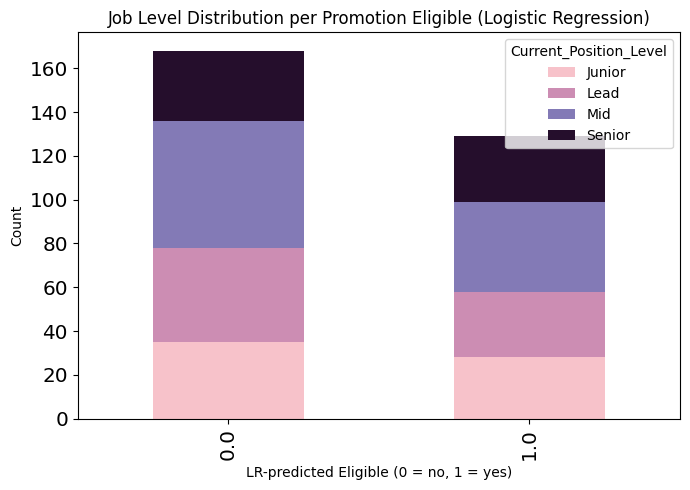

In [ ]:
crosstab_lr = (
    pred_lr_df
    .groupby(['y_pred', 'Current_Position_Level'])
    .size()
    .unstack(fill_value=0)
)

crosstab_lr.plot(
    kind='bar',
    stacked=True,
    figsize=(7, 5),
    color=['#F7C2CA', '#CC8DB3', '#837AB6', '#250E2C']
)
plt.xlabel('LR-predicted Eligible (0 = no, 1 = yes)')
plt.ylabel('Count')
plt.title('Job Level Distribution per Promotion Eligible (Logistic Regression)')
plt.legend(title='Current_Position_Level')
plt.tight_layout()
plt.show()

### Age Distribution

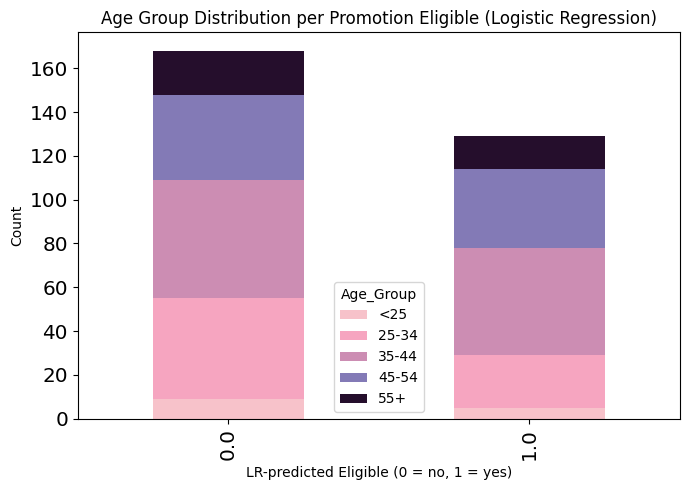

In [ ]:
age_pred_df_lr = pd.DataFrame({
    'y_pred': y_pred_lr,
    'Age_Group': df.loc[X_test.index, 'Age_Group']
})

ct_age_lr = (
    age_pred_df_lr
    .groupby(['y_pred', 'Age_Group'])
    .size()
    .unstack(fill_value=0)
)

ct_age_lr.plot(
    kind='bar',
    stacked=True,
    figsize=(7, 5),
    color=['#F7C2CA', '#F6A5C0', '#CC8DB3', '#837AB6', '#250E2C']
)
plt.xlabel('LR-predicted Eligible (0 = no, 1 = yes)')
plt.ylabel('Count')
plt.title('Age Group Distribution per Promotion Eligible (Logistic Regression)')
plt.legend(title='Age_Group')
plt.tight_layout()
plt.show()

### Target Distribution

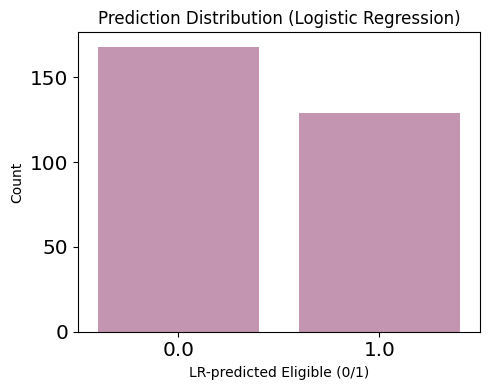

In [ ]:
plt.figure(figsize=(5,4))
sns.countplot(
    x=y_pred_lr,
    color='#CC8DB3'
)
plt.xlabel('LR-predicted Eligible (0/1)')
plt.ylabel('Count')
plt.title('Prediction Distribution (Logistic Regression)')
plt.tight_layout()
plt.show()

## **Fairness**

In [ ]:
def recall_per_group(df, group_col):
    g = (
        df
        .groupby(group_col)
        .apply(lambda x: (
            ((x['y_true'] == 1) & (x['y_pred'] == 1)).sum()
            / max(1, (x['y_true'] == 1).sum())
        ))
        .rename('recall')
        .reset_index()
    )
    return g

In [ ]:
fair_age_lr = recall_per_group(eval_lr_df, 'Age_Group')
fair_job_lr = recall_per_group(eval_lr_df, 'Job_Level')

print("Recall per Age Group (LR):")
print(fair_age_lr)

print("\nRecall per Job Level (LR):")
print(fair_job_lr)

Recall per Age Group (LR):
  Age_Group    recall
0       <25  1.000000
1     25-34  0.434783
2     35-44  0.400000
3     45-54  0.444444
4       55+  0.600000

Recall per Job Level (LR):
  Job_Level    recall
0    Junior  0.555556
1      Lead  0.333333
2       Mid  0.419355
3    Senior  0.500000


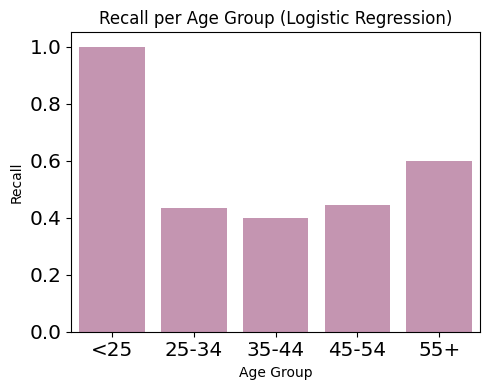

In [ ]:
plt.figure(figsize=(5,4))
sns.barplot(
    data=fair_age_lr,
    x='Age_Group',
    y='recall',
    color='#CC8DB3'
)
plt.ylim(0, 1.05)
plt.xlabel('Age Group')
plt.ylabel('Recall')
plt.title('Recall per Age Group (Logistic Regression)')
plt.tight_layout()
plt.show()


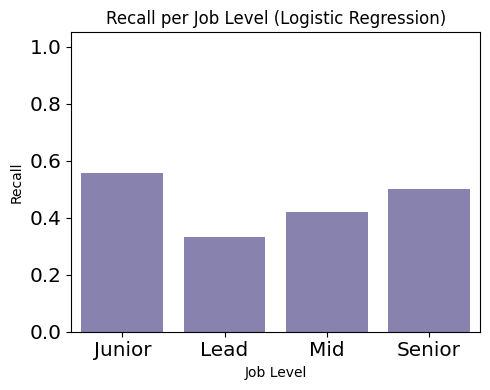

In [ ]:
plt.figure(figsize=(5,4))
sns.barplot(
    data=fair_job_lr,
    x='Job_Level',
    y='recall',
    color='#837AB6'
)
plt.ylim(0, 1.05)
plt.xlabel('Job Level')
plt.ylabel('Recall')
plt.title('Recall per Job Level (Logistic Regression)')
plt.tight_layout()
plt.show()

# **SHAP & LIME**

In [ ]:
# Ambil pipeline terbaik
best_lr_pipeline = grid_lr.best_estimator_

# Ekstrak model XGBClassifier di dalam pipeline
final_lr = best_lr_pipeline.named_steps["model"]

print(final_lr)

LogisticRegression(C=0.001, class_weight='balanced', max_iter=5000,
                   random_state=42, solver='liblinear')


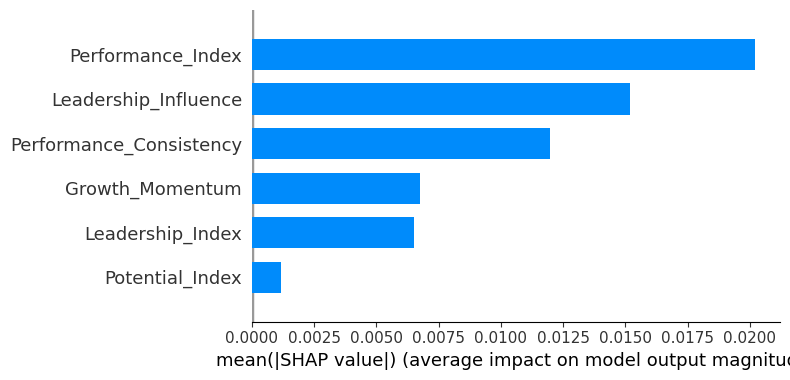

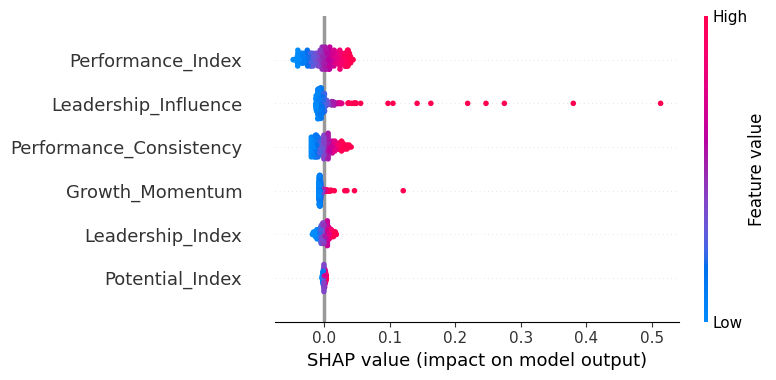

In [ ]:
import shap

# masker / background data (biasanya pakai X_train)
masker = shap.maskers.Independent(X_train)

explainer = shap.LinearExplainer(final_lr, masker=masker)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test, plot_type="bar")
shap.summary_plot(shap_values, X_test)

In [ ]:
pip install lime

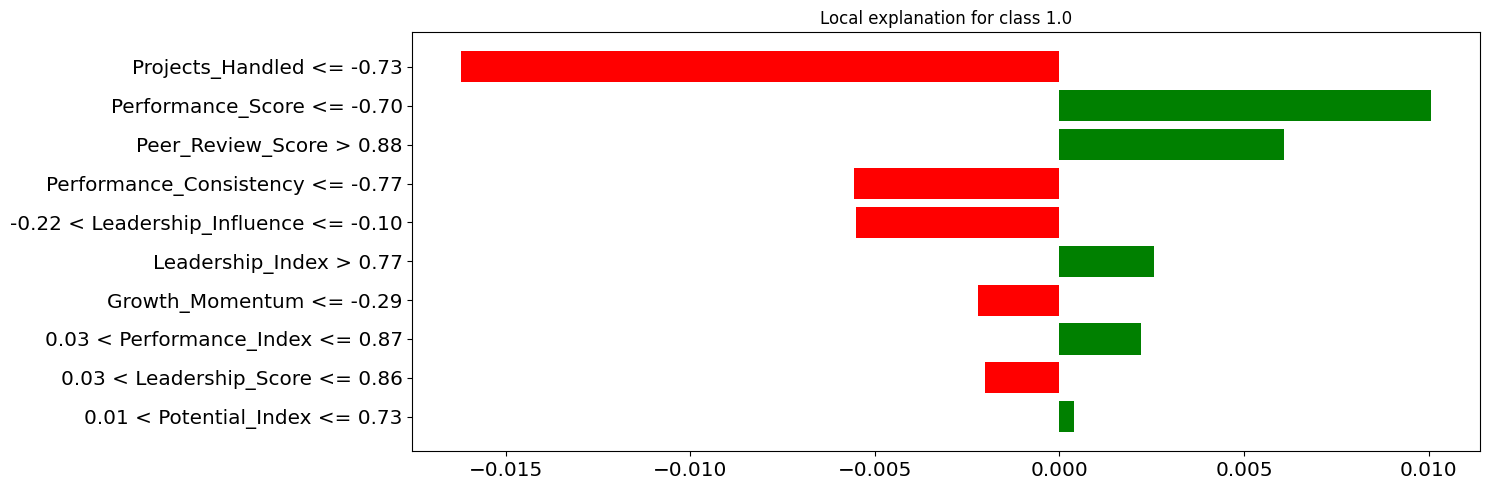

In [ ]:
from lime import lime_tabular
import numpy as np

# LIME initialization
lime_explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X_train.columns,
    class_names=[str(c) for c in np.unique(y_train)],
    mode='classification'
)

best_rf_pipeline = grid_lr.best_estimator_
rf_model_for_lime = best_rf_pipeline.named_steps["model"]

# Pilih satu sampel untuk interpretasi
sample_idx = 0

lime_exp = lime_explainer.explain_instance(
    data_row=X_test.iloc[sample_idx],
    predict_fn=rf_model_for_lime.predict_proba
)

# --- Buat figure LIME ---
fig = lime_exp.as_pyplot_figure()

plt.tight_layout()